In [1]:
import pandas as pd

# Load sentiment and thematic data
sentiment_df = pd.read_csv("../data/sentiment_reviews.csv")
theme_df = pd.read_csv("../data/thematic_reviews.csv")


Sentiment Trend Over Time

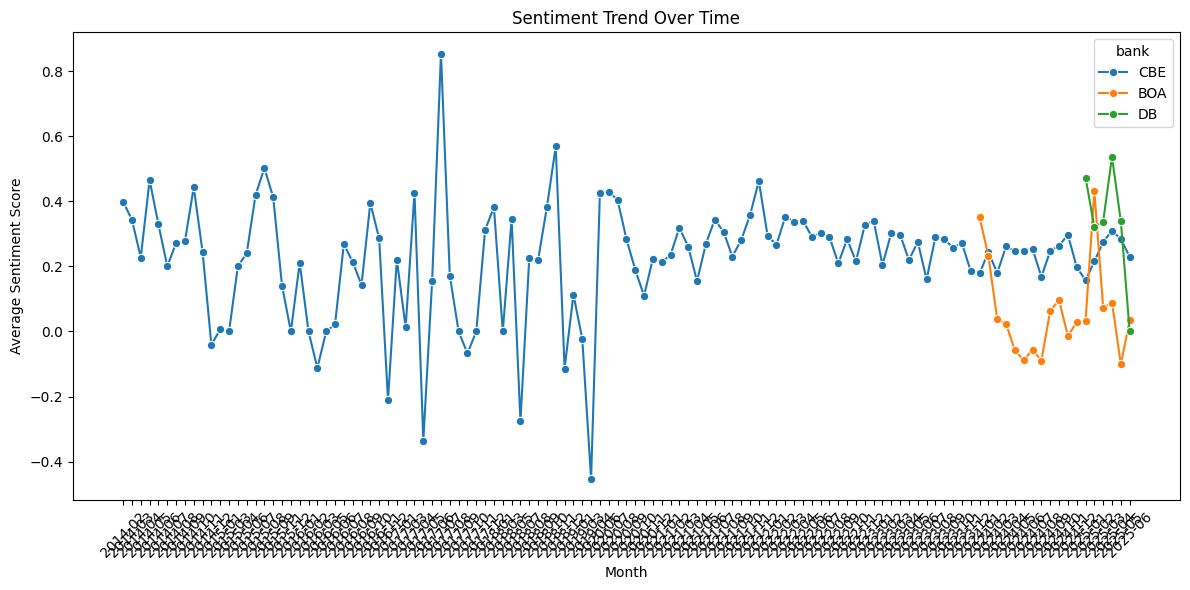

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
monthly_sentiment = sentiment_df.groupby([sentiment_df['date'].dt.to_period('M'), 'bank'])['sentiment_score'].mean().reset_index()
monthly_sentiment['date'] = monthly_sentiment['date'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sentiment_score', hue='bank', data=monthly_sentiment, marker='o')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Rating Distribution by Bank

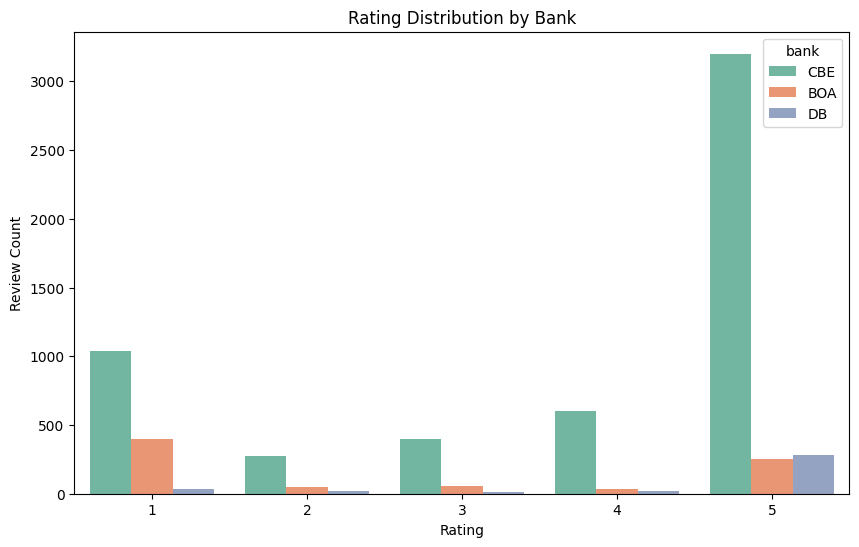

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='bank', data=sentiment_df, palette='Set2')
plt.title("Rating Distribution by Bank")
plt.xlabel("Rating")
plt.ylabel("Review Count")
plt.show()


Word Clouds for Drivers & Pain Points

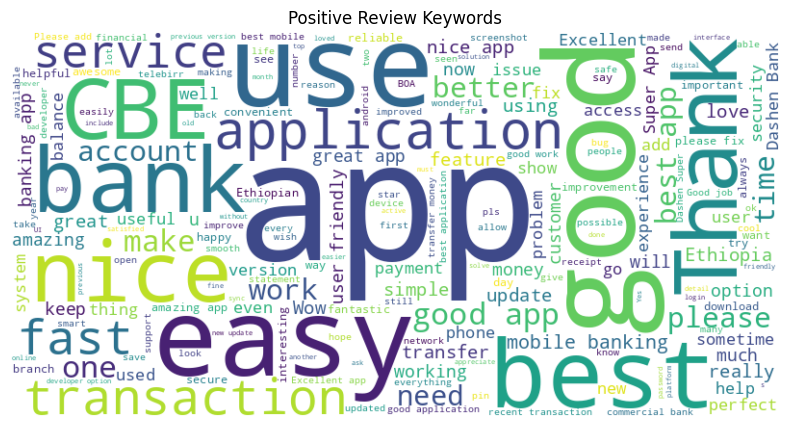

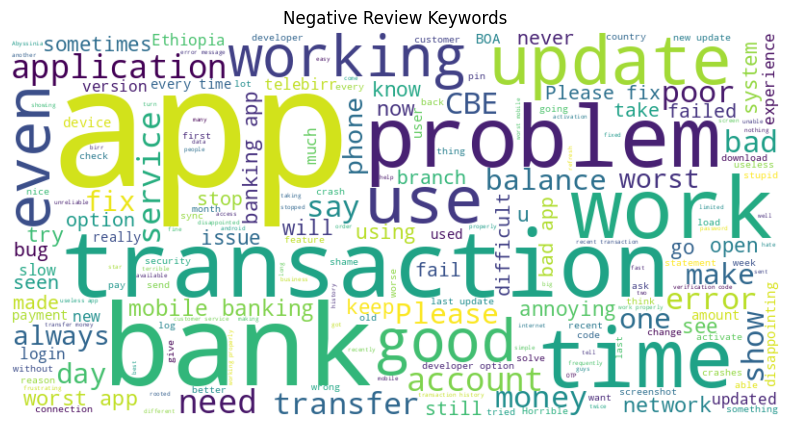

In [5]:
from wordcloud import WordCloud

positive = sentiment_df[sentiment_df['sentiment_label'] == 'positive']['review'].dropna().str.cat(sep=' ')
negative = sentiment_df[sentiment_df['sentiment_label'] == 'negative']['review'].dropna().str.cat(sep=' ')

# Positive Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(positive), interpolation='bilinear')
plt.axis('off')
plt.title("Positive Review Keywords")
plt.show()

# Negative Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(negative), interpolation='bilinear')
plt.axis('off')
plt.title("Negative Review Keywords")
plt.show()


Theme Frequency Across Banks

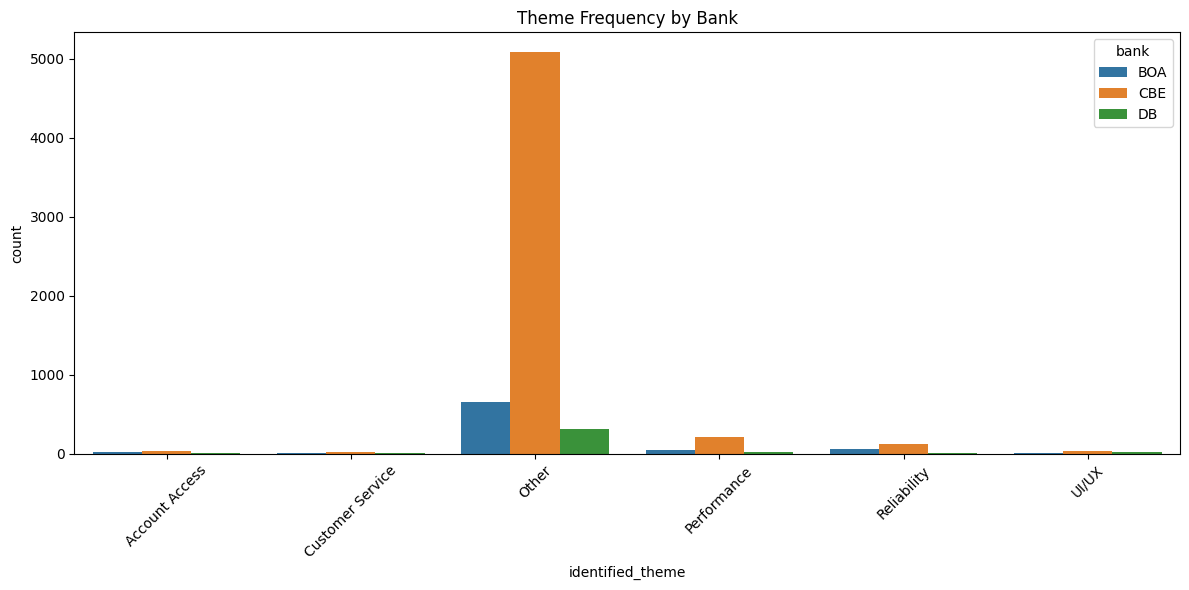

In [6]:
theme_counts = theme_df.groupby(['bank', 'identified_theme']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='identified_theme', y='count', hue='bank', data=theme_counts)
plt.title("Theme Frequency by Bank")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
